<a href="https://colab.research.google.com/github/yoosukyeong/Machine_Learning_basic/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.datasets import mnist

# mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# MNIST 데이터를 정규화, 784로 맞춤
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.
train_x = train_x.reshape((len(train_x), 784))
test_x = test_x.reshape((len(test_x), 784))
print (train_x.shape)
print (test_x.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
from keras import models, layers

In [3]:
train_y_cat_labels = to_categorical(train_y)
test_y_cat_labels = to_categorical(test_y)

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.fit(train_x, train_y_cat_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2575 - accuracy: 0.9264
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1127 - accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0776 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0579 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0447 - accuracy: 0.9863


In [7]:
test_loss, test_acc = model.evaluate(test_x, test_y_cat_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9767


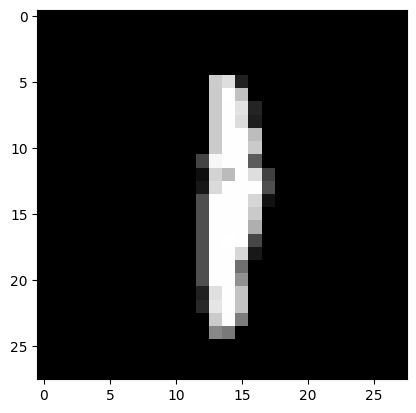

313/313 [==============================] - 1s 2ms/step
1201th number => Predicted = [1.2901029e-10 9.9953157e-01 6.5625088e-08 4.6326061e-08 6.6390588e-05
 2.7994491e-09 3.4860845e-09 3.7084101e-04 9.6036447e-06 2.1380891e-05], 1 : 0


In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

# 랜덤한 index의 숫자를 하나 고르기
random_number = random.randrange(0, 10000, 1) # 0~10000 사이 숫자 난수

# 임의의 해당 숫자 이미지 출력
showImage = test_x[random_number]
plt.imshow(showImage.reshape(28,28), cmap='gray')
plt.show()

predicted = model.predict(test_x)
predicted_label = np.argmax(predicted[random_number], axis=0)
actual_label = np.argmax(test_y[random_number], axis=0)

print("{}th number => Predicted = {}, {} : {}".format(random_number, predicted[random_number], predicted_label, actual_label))